In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from IPython.display import display

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# TODO: Loading the dataset
data_path = os.path.join("../data", "train.csv")
data = pd.read_csv(data_path)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# TODO: Visualize the data statistical overview
print("Statistical Overview:")
display(data.describe())

print("\nDataset Information:")
data.info()

print("\nMissing Values:")
display(data.isna().sum())

Statistical Overview:


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null  

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
# TODO: Sample a few rows from the dataset, random seed for reproducability
data.sample(10, random_state=10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4495,4496,CA-2018-112753,18/06/2018,23/06/2018,Standard Class,CC-12670,Craig Carreira,Consumer,United States,Los Angeles,California,90032.0,West,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",917.9235
192,193,CA-2016-102281,12/10/2016,14/10/2016,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,New York,10035.0,East,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.3520
9075,9076,US-2016-136259,05/11/2016,08/11/2016,First Class,CB-12415,Christy Brittain,Consumer,United States,Lakewood,Ohio,44107.0,East,OFF-BI-10000773,Office Supplies,Binders,Insertable Tab Post Binder Dividers,7.2180
1523,1524,CA-2016-144806,06/12/2016,11/12/2016,Standard Class,GH-14425,Gary Hwang,Consumer,United States,Tucson,Arizona,85705.0,West,OFF-PA-10003039,Office Supplies,Paper,Xerox 1960,198.2720
2145,2146,US-2017-152051,25/06/2017,29/06/2017,Standard Class,TS-21160,Theresa Swint,Corporate,United States,York,Pennsylvania,17403.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,422.0580
5160,5161,CA-2016-156146,26/10/2016,30/10/2016,Second Class,AG-10495,Andrew Gjertsen,Corporate,United States,Peoria,Arizona,85345.0,West,TEC-PH-10001527,Technology,Phones,Plantronics MX500i Earset,68.7200
1645,1646,CA-2016-111829,19/03/2016,20/03/2016,First Class,FH-14365,Fred Hopkins,Corporate,United States,Seattle,Washington,98115.0,West,OFF-PA-10004359,Office Supplies,Paper,Multicolor Computer Printout Paper,209.7000
8077,8078,CA-2016-106187,23/06/2016,29/06/2016,Standard Class,RF-19345,Randy Ferguson,Corporate,United States,East Point,Georgia,30344.0,South,OFF-BI-10004519,Office Supplies,Binders,GBC DocuBind P100 Manual Binding Machine,165.9800
8094,8095,CA-2018-133046,27/07/2018,01/08/2018,Second Class,DK-13375,Dennis Kane,Consumer,United States,Seattle,Washington,98115.0,West,OFF-PA-10003883,Office Supplies,Paper,"Message Book, Phone, Wirebound Standard Line M...",26.2000
5439,5440,CA-2017-167115,04/04/2017,09/04/2017,Standard Class,EH-14185,Evan Henry,Consumer,United States,New York City,New York,10035.0,East,OFF-BI-10004600,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,588.7840


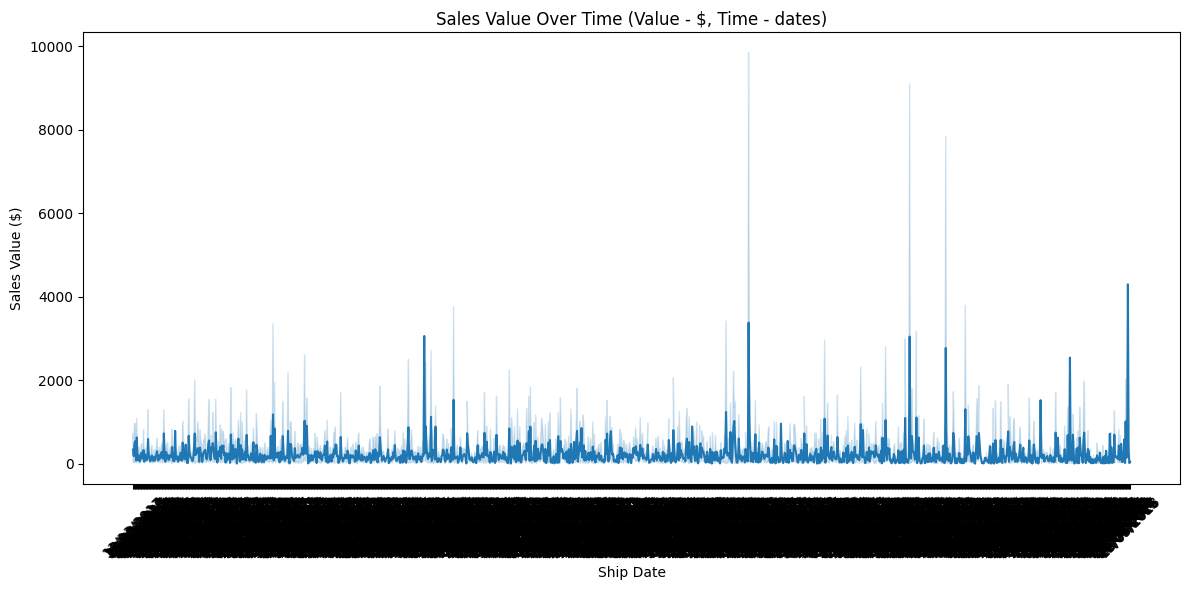

In [5]:
# TODO: Visualize the sales volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Ship Date", y="Sales")
plt.title("Sales Value Over Time (Value - $, Time - dates)")
plt.xlabel("Ship Date")
plt.ylabel("Sales Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# # TODO: Smooth the sales value data to get a smoother curve
# data["smoothed_sales"] = data["Sales"].rolling(window=250, center=True).mean()
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=data, x="Ship Date", y="smoothed_sales")
# plt.title("Sales Value Over Time (Value - $, Time - dates)")
# plt.xlabel("Ship Date")
# plt.ylabel("Sales Value ($)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

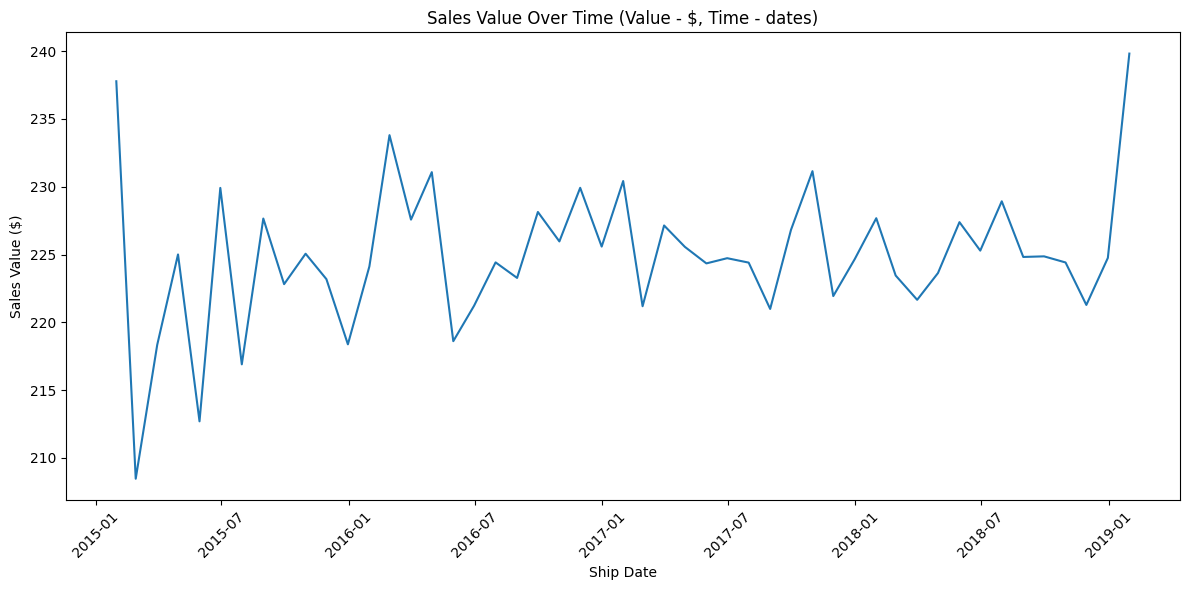

In [7]:
# TODO: Smooth using Exponential Moving Average(EMA)

data["Ship Date"] = pd.to_datetime(data["Ship Date"], dayfirst=True)
data.sort_index(ascending=False, inplace=True)
data.set_index('Ship Date', inplace=True)
data["ema_sales"] = data["Sales"].ewm(span=500, adjust=False).mean()
data_monthly = data[["Sales", "ema_sales"]].resample("M").mean()
data_monthly.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_monthly, x="Ship Date", y="ema_sales")
plt.title("Sales Value Over Time (Value - $, Time - dates)")
plt.xlabel("Ship Date")
plt.ylabel("Sales Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

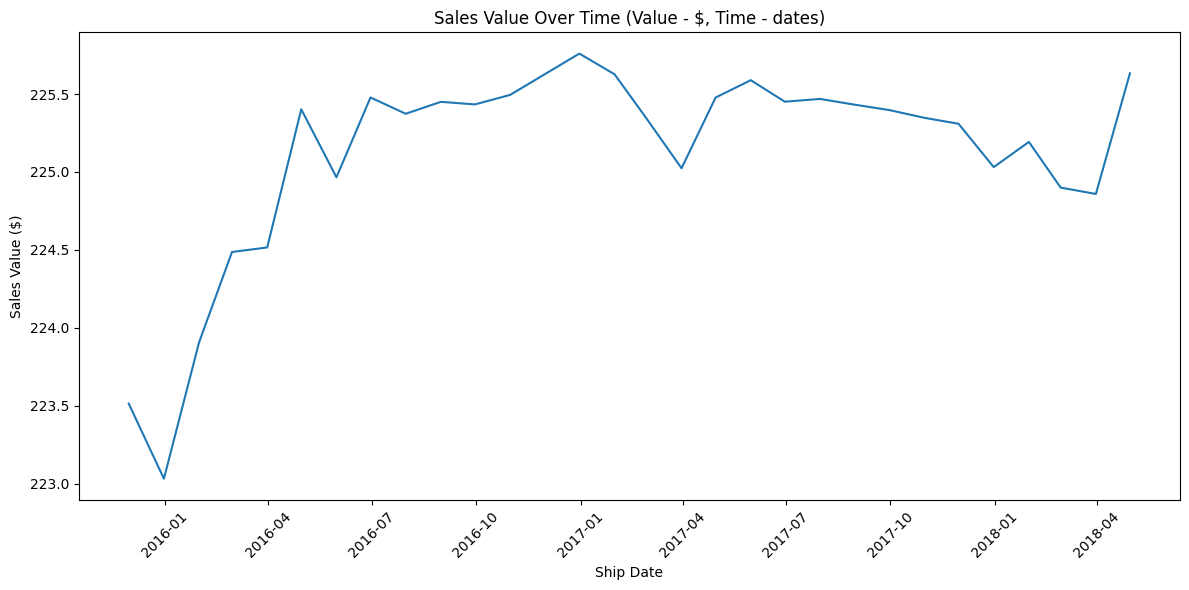

In [8]:
data_monthly["ema_sales_smoothed"] = data_monthly["ema_sales"].rolling(window=20, center=True).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_monthly, x="Ship Date", y="ema_sales_smoothed")
plt.title("Sales Value Over Time (Value - $, Time - dates)")
plt.xlabel("Ship Date")
plt.ylabel("Sales Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
data.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,ema_sales
Ship Date,,,,,,,,,,,,,,,,,,
2016-01-17,9800,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,10.384000
2016-01-17,9799,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,10.447840
2016-01-17,9798,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,11.345007
2016-01-17,9797,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,11.341106
2017-05-28,9796,CA-2017-125920,21/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,11.310994


In [10]:
data.describe()

,Row ID,Postal Code,Sales,ema_sales
count,9800.000000,9789.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059,224.678771
std,2829.160653,32041.223413,626.651875,36.319118
min,1.000000,1040.000000,0.444000,10.384000
25%,2450.750000,23223.000000,17.248000,206.206693
50%,4900.500000,58103.000000,54.490000,222.661276
75%,7350.250000,90008.000000,210.605000,242.247275
max,9800.000000,99301.000000,22638.480000,346.426288


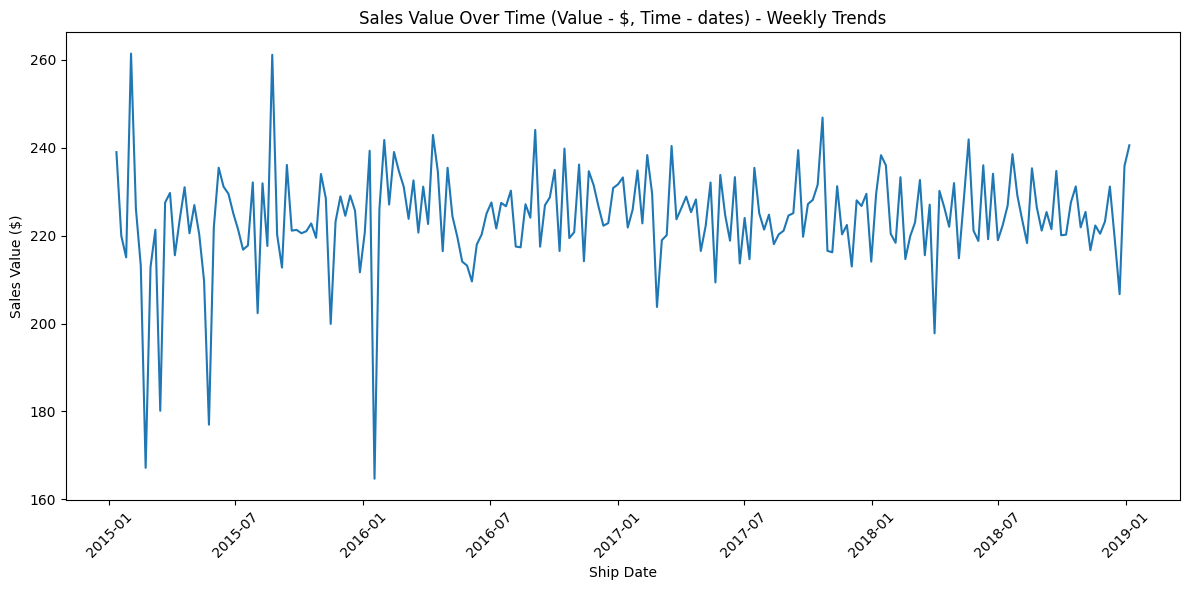

In [11]:
data_weekly = data[["Sales", "ema_sales"]].resample("W").mean()
data_weekly.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_weekly, x="Ship Date", y="ema_sales")
plt.title("Sales Value Over Time (Value - $, Time - dates) - Weekly Trends")
plt.xlabel("Ship Date")
plt.ylabel("Sales Value ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

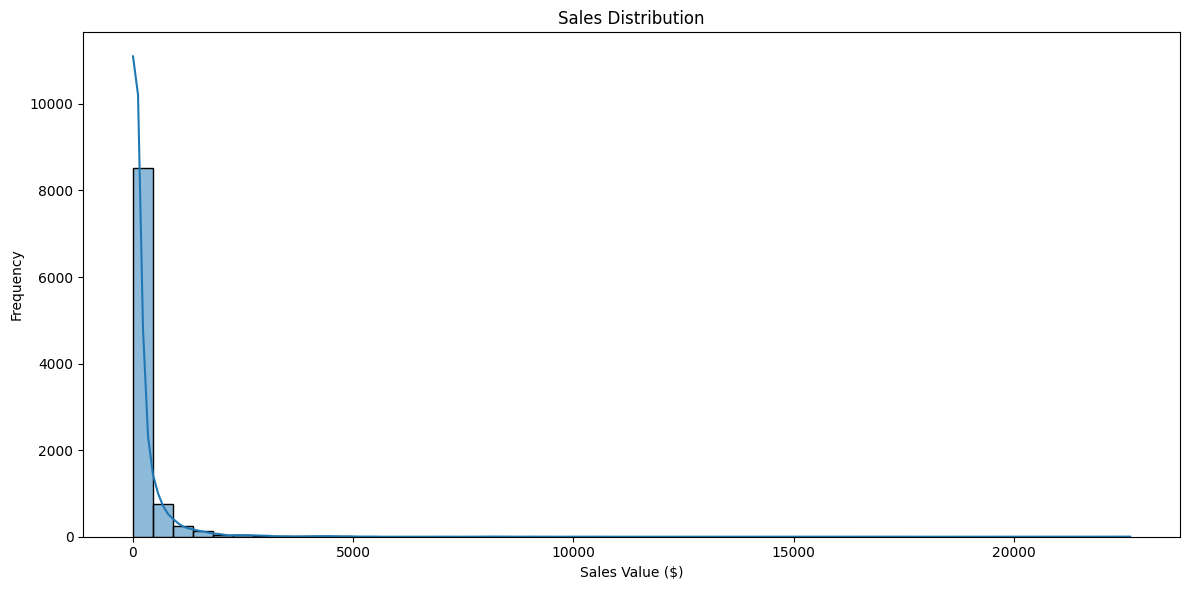

In [12]:
# TODO: Plot the distribution of sales using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="Sales", bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales Value ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [13]:
# get the  names of the columns
columns = data.columns
print("Columns in the dataset:", list(columns))

Columns in the dataset: ['Row ID', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'ema_sales']


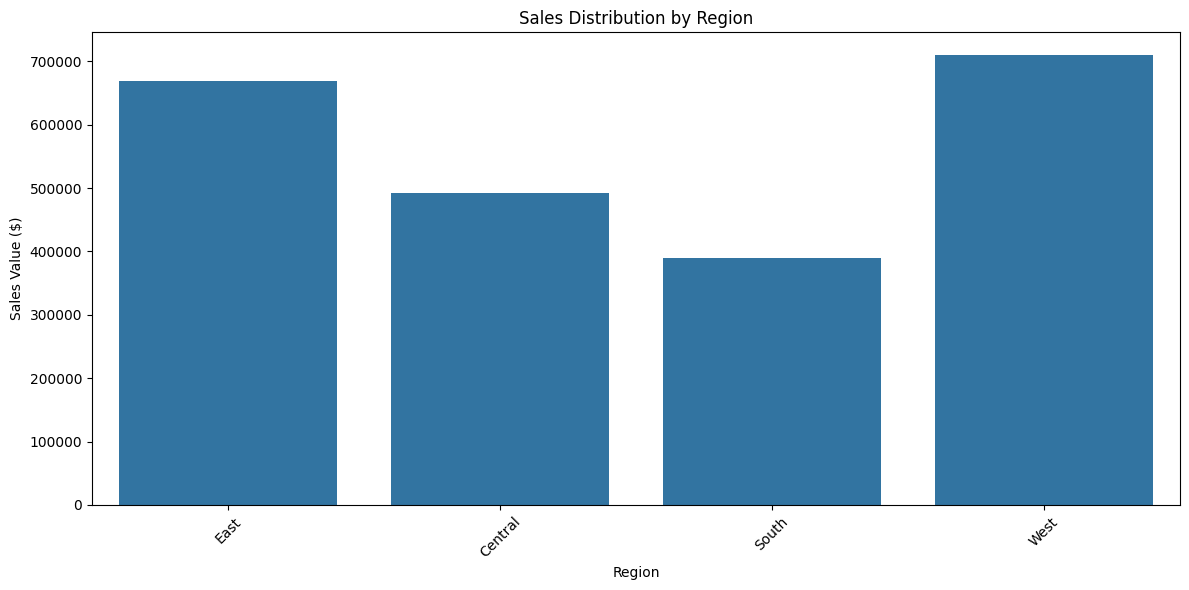

In [14]:
#  TODO: Visualize the distribution of sales by region
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Region", y="Sales", estimator=np.sum, ci=None)
plt.title("Sales Distribution by Region")
plt.ylabel("Sales Value ($)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

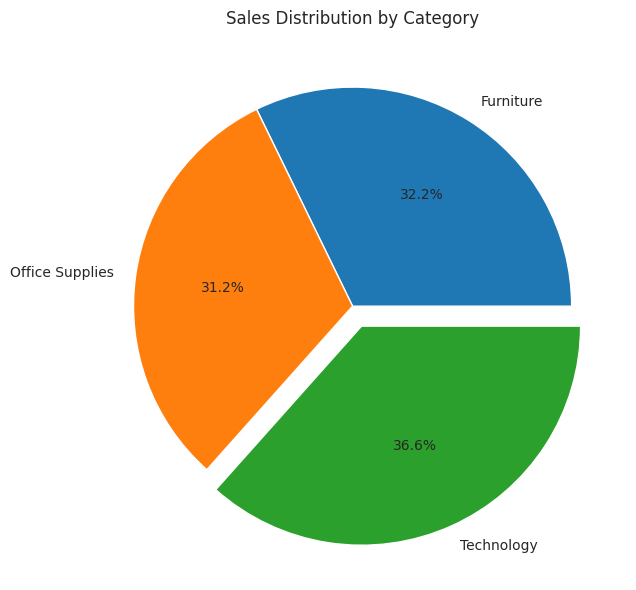

In [15]:
# TODO: Plot sales contribution for individual products
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Calculate sales sum by category
category_sales = data.groupby('Category')['Sales'].sum()

# Create pie chart
plt.pie(x=category_sales.values, labels=category_sales.index, autopct='%1.1f%%', explode=[0, 0, 0.1])
plt.title("Sales Distribution by Category")

plt.tight_layout()
plt.show()

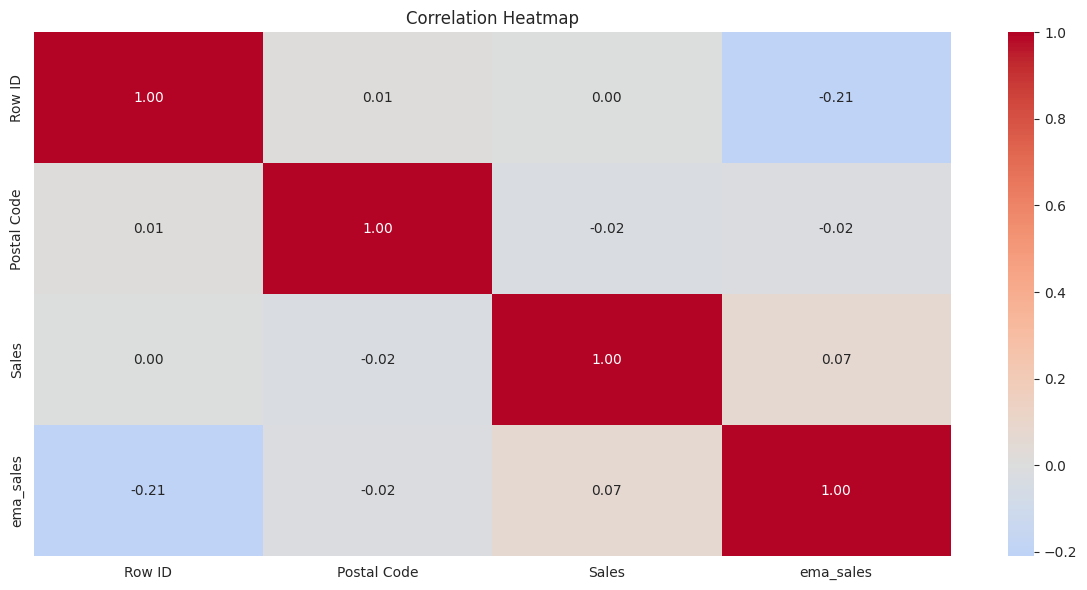

In [16]:
# Visualize the correlation for the numerical columns in the dataset
numerical = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [17]:
# TODO: Drop the columns that make no significant contribution to the analysis
data.drop(columns=["Row ID", "Order ID", "Order Date", "Customer ID", "Product ID", "Postal Code"], inplace=True)

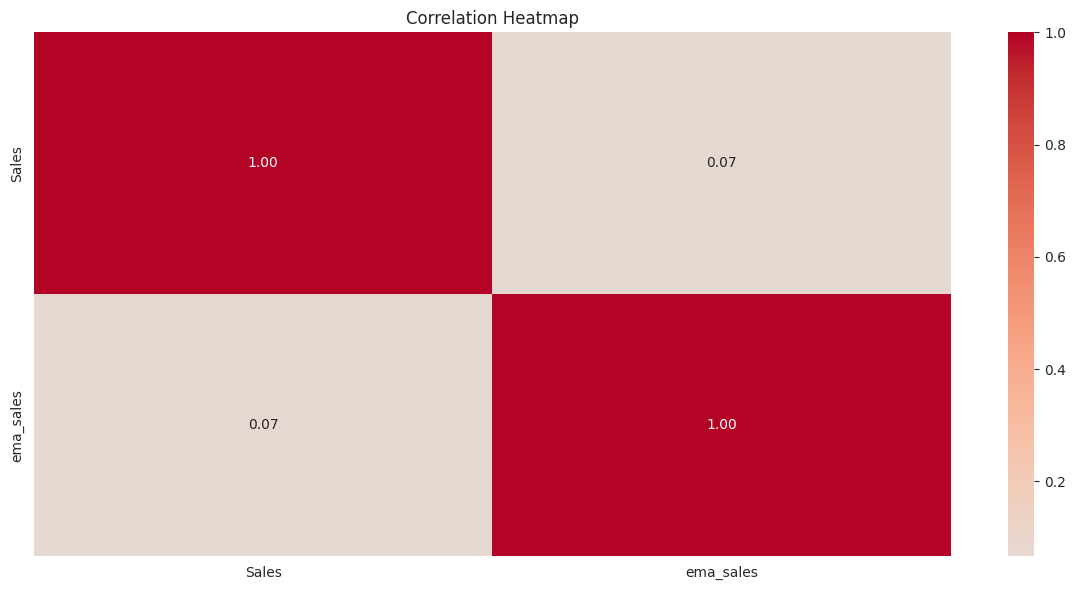

In [18]:
# Visualize the correlation for the numerical columns in the dataset
numerical = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# NOTE: ema_sales is not required in our case, here's why, I created the feature using the \
# sales column for Exponential Moving Average(EMA) and then used the EMA column to create a \
# smoothed version of the Sales column.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2016-01-17 to 2017-11-11
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship Mode      9800 non-null   object 
 1   Customer Name  9800 non-null   object 
 2   Segment        9800 non-null   object 
 3   Country        9800 non-null   object 
 4   City           9800 non-null   object 
 5   State          9800 non-null   object 
 6   Region         9800 non-null   object 
 7   Category       9800 non-null   object 
 8   Sub-Category   9800 non-null   object 
 9   Product Name   9800 non-null   object 
 10  Sales          9800 non-null   float64
 11  ema_sales      9800 non-null   float64
dtypes: float64(2), object(10)
memory usage: 995.3+ KB


In [20]:
data.head()

,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,ema_sales
Ship Date,,,,,,,,,,,,
2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,10.384000
2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,10.447840
2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,Technology,Phones,GE 30524EE4,235.188,11.345007
2016-01-17,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,11.341106
2017-05-28,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,11.310994


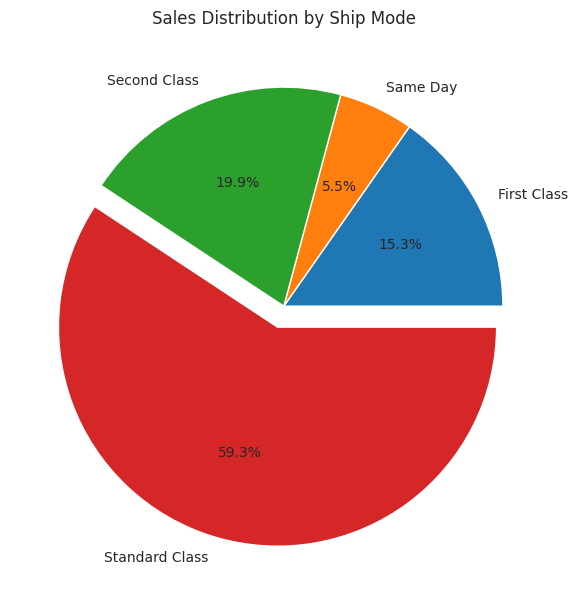

In [21]:
# TODO: Plot for the ship modes and the total sales value for each ship mode category
sales_ship_mode = data.groupby('Ship Mode')['Sales'].sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.pie(x=sales_ship_mode.values, labels=sales_ship_mode.index, autopct='%1.1f%%', explode=(0, 0, 0, 0.1))
plt.title("Sales Distribution by Ship Mode")
plt.tight_layout()
plt.show()

In [22]:
data.nunique()

Ship Mode           4
Customer Name     793
Segment             3
Country             1
City              529
State              49
Region              4
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
ema_sales        9800
dtype: int64

In [23]:
data["Segment"].unique()

array(['Corporate', 'Consumer', 'Home Office'], dtype=object)

In [24]:
# As of now, we can tell that Country is not a significant feature for our analysis \
# and we can drop it. The same goes for the Segment column, as it has only 3 unique values. \ 
# We can drop it as well. The same goes for Region, Category and Ship Mode columns.
data.drop(columns=["Country", "Segment", "Region", "Category", "Ship Mode", "ema_sales"], inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2016-01-17 to 2017-11-11
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9800 non-null   object 
 1   City           9800 non-null   object 
 2   State          9800 non-null   object 
 3   Sub-Category   9800 non-null   object 
 4   Product Name   9800 non-null   object 
 5   Sales          9800 non-null   float64
dtypes: float64(1), object(5)
memory usage: 535.9+ KB


,Customer Name,City,State,Sub-Category,Product Name,Sales
Ship Date,,,,,,
2016-01-17,Cindy Schnelling,Toledo,Ohio,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384
2016-01-17,Cindy Schnelling,Toledo,Ohio,Phones,Anker 24W Portable Micro USB Car Charger,26.376
2016-01-17,Cindy Schnelling,Toledo,Ohio,Phones,GE 30524EE4,235.188
2016-01-17,Cindy Schnelling,Toledo,Ohio,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
2017-05-28,Sally Hughsby,Chicago,Illinois,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798


In [25]:
data.index

DatetimeIndex(['2016-01-17', '2016-01-17', '2016-01-17', '2016-01-17',
               '2017-05-28', '2015-05-23', '2015-05-23', '2015-05-23',
               '2015-05-23', '2018-04-01',
               ...
               '2015-06-14', '2015-06-14', '2015-06-14', '2015-06-14',
               '2015-06-14', '2016-10-18', '2016-10-18', '2017-06-16',
               '2017-11-11', '2017-11-11'],
              dtype='datetime64[ns]', name='Ship Date', length=9800, freq=None)

In [26]:
# TODO: Including DOW, Month, Year, Weekend and Quarter as features
data["dayofweek"] = data.index.dayofweek
data["month"] = data.index.month
data["Year"] = data.index.year
data["is_weekend"] = np.where(data.index.dayofweek >= 5, 1, 0)
data["quarter"] = data.index.quarter
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2016-01-17 to 2017-11-11
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9800 non-null   object 
 1   City           9800 non-null   object 
 2   State          9800 non-null   object 
 3   Sub-Category   9800 non-null   object 
 4   Product Name   9800 non-null   object 
 5   Sales          9800 non-null   float64
 6   dayofweek      9800 non-null   int32  
 7   month          9800 non-null   int32  
 8   Year           9800 non-null   int32  
 9   is_weekend     9800 non-null   int64  
 10  quarter        9800 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 765.6+ KB


,Customer Name,City,State,Sub-Category,Product Name,Sales,dayofweek,month,Year,is_weekend,quarter
Ship Date,,,,,,,,,,,
2016-01-17,Cindy Schnelling,Toledo,Ohio,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,6,1,2016,1,1
2016-01-17,Cindy Schnelling,Toledo,Ohio,Phones,Anker 24W Portable Micro USB Car Charger,26.376,6,1,2016,1,1
2016-01-17,Cindy Schnelling,Toledo,Ohio,Phones,GE 30524EE4,235.188,6,1,2016,1,1
2016-01-17,Cindy Schnelling,Toledo,Ohio,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,6,1,2016,1,1
2017-05-28,Sally Hughsby,Chicago,Illinois,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,6,5,2017,1,2


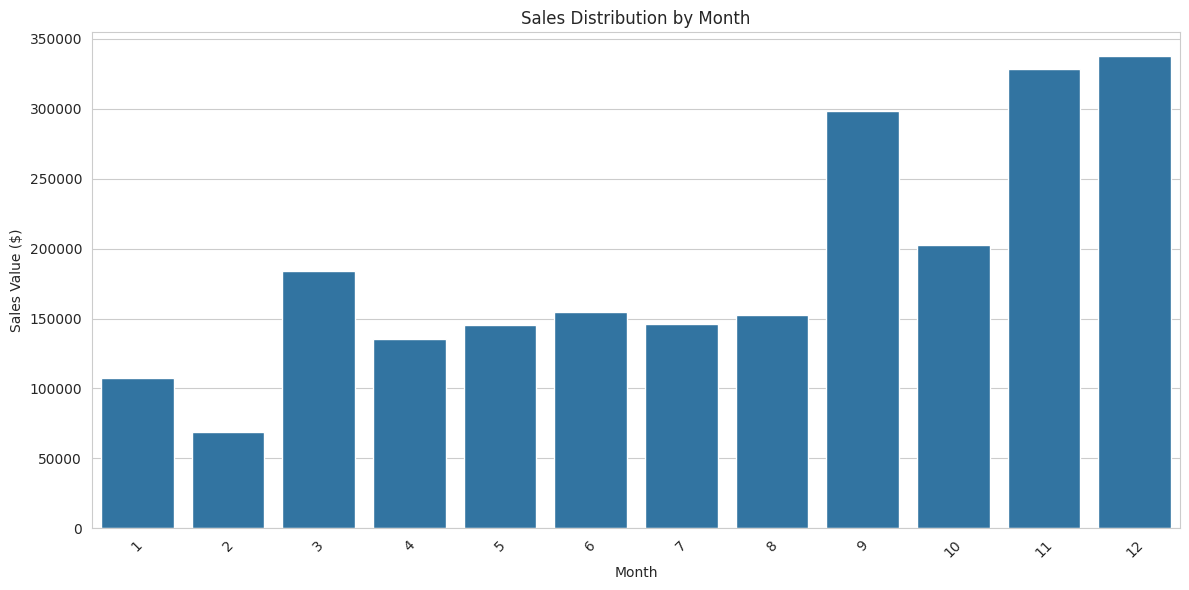

In [27]:
# TODO: Visualize sales by month
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="month", y="Sales", estimator=np.sum, ci=None)
plt.title("Sales Distribution by Month")
plt.ylabel("Sales Value ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

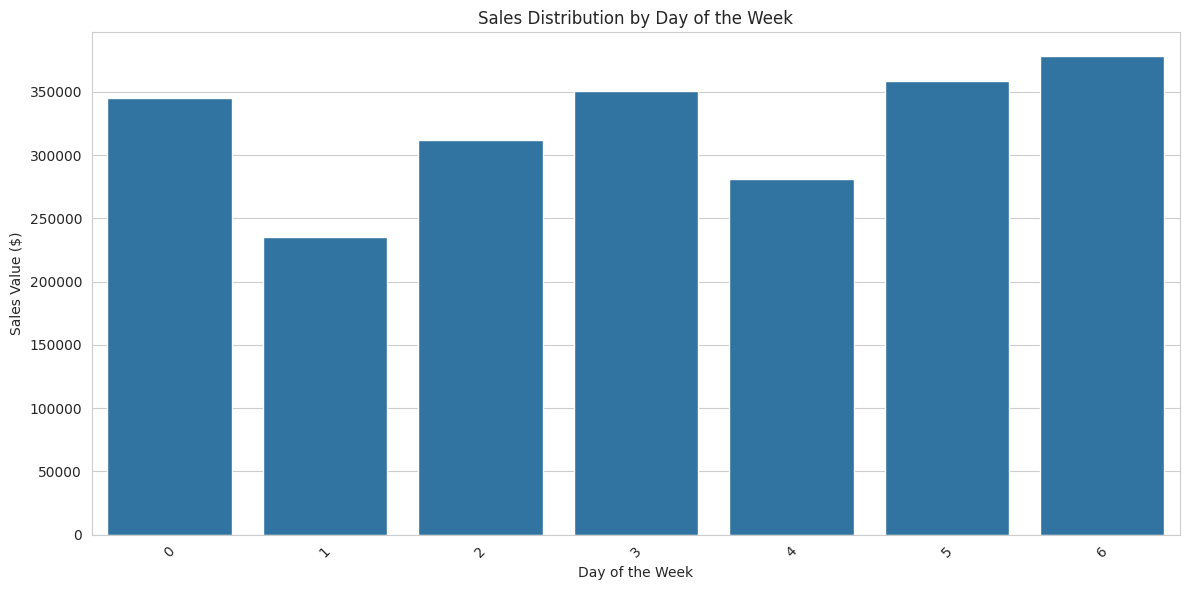

In [28]:
# TODO: Plot the distribution of sales by the day of the week
# NOTE: 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="dayofweek", y="Sales", estimator=np.sum, ci=None)
plt.title("Sales Distribution by Day of the Week")
plt.ylabel("Sales Value ($)")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from typing import Dict, Tuple

# TODO: Function for label Encoding the categorical columns
def encode_categorical_column(df: pd.DataFrame, column: str) -> Tuple[pd.DataFrame, Dict[str, int]]:
    """This function creates encoding for  a categorical column and returns the new df and a dictionary
    with the mapping of the categorical column to the new values.
    """
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return df, mapping


# TODO: Create cyclic features for the year, quarter, month and day of the week
def create_cyclic_features(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """This function creates cyclic features for time columns"""
    df[column + "_sin"] = np.sin(2 * np.pi * df[column] / df[column].max())
    df[column + "_cos"] = np.cos(2 * np.pi * df[column] / df[column].max())
    return df


categorical_cols = ["Customer Name", "City", "State", "Sub-Category", "Product Name"]
labels = []

for col in categorical_cols:
    data, mapping = encode_categorical_column(data, col)
    labels.append(mapping)
    print(f"Encoded {col} with mapping: {mapping}")
# Create cyclic features for the month and day of the week
for col in ["month", "dayofweek", "Year", "quarter"]:
    data = create_cyclic_features(data, col)
    print(f"Created cyclic features for {col}")

Encoded Customer Name with mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33), np.int64(34): np.int64(34), np.

In [31]:
data.head()

,Customer Name,City,State,Sub-Category,Product Name,Sales,dayofweek,month,Year,is_weekend,quarter,month_sin,month_cos,dayofweek_sin,dayofweek_cos,Year_sin,Year_cos,quarter_sin,quarter_cos
Ship Date,,,,,,,,,,,,,,,,,,,
2016-01-17,164,483,33,0,1399,10.384,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,13,148,26.376,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,13,724,235.188,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,2,277,10.368,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2017-05-28,663,80,11,3,408,3.798,6,5,2017,1,2,0.5,-0.866025,-2.449294e-16,1.0,-0.006224,0.999981,1.224647e-16,-1.000000e+00


In [32]:
# TODO: Standardize Sales Column
scaler = StandardScaler()
data["Sales"] = scaler.fit_transform(data[["Sales"]])
data.head()

,Customer Name,City,State,Sub-Category,Product Name,Sales,dayofweek,month,Year,is_weekend,quarter,month_sin,month_cos,dayofweek_sin,dayofweek_cos,Year_sin,Year_cos,quarter_sin,quarter_cos
Ship Date,,,,,,,,,,,,,,,,,,,
2016-01-17,164,483,33,0,1399,-0.351705,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,13,148,-0.326183,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,13,724,0.007052,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,2,277,-0.351730,6,1,2016,1,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2017-05-28,663,80,11,3,408,-0.362215,6,5,2017,1,2,0.5,-0.866025,-2.449294e-16,1.0,-0.006224,0.999981,1.224647e-16,-1.000000e+00


In [34]:
data = data.drop(columns=["dayofweek", "month", "Year", "quarter"])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2016-01-17 to 2017-11-11
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9800 non-null   int64  
 1   City           9800 non-null   int64  
 2   State          9800 non-null   int64  
 3   Sub-Category   9800 non-null   int64  
 4   Product Name   9800 non-null   int64  
 5   Sales          9800 non-null   float64
 6   is_weekend     9800 non-null   int64  
 7   month_sin      9800 non-null   float64
 8   month_cos      9800 non-null   float64
 9   dayofweek_sin  9800 non-null   float64
 10  dayofweek_cos  9800 non-null   float64
 11  Year_sin       9800 non-null   float64
 12  Year_cos       9800 non-null   float64
 13  quarter_sin    9800 non-null   float64
 14  quarter_cos    9800 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 1.2 MB


,Customer Name,City,State,Sub-Category,Product Name,Sales,is_weekend,month_sin,month_cos,dayofweek_sin,dayofweek_cos,Year_sin,Year_cos,quarter_sin,quarter_cos
Ship Date,,,,,,,,,,,,,,,
2016-01-17,164,483,33,0,1399,-0.351705,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,13,148,-0.326183,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,13,724,0.007052,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2016-01-17,164,483,33,2,277,-0.351730,1,0.5,0.866025,-2.449294e-16,1.0,-0.009336,0.999956,1.000000e+00,6.123234e-17
2017-05-28,663,80,11,3,408,-0.362215,1,0.5,-0.866025,-2.449294e-16,1.0,-0.006224,0.999981,1.224647e-16,-1.000000e+00


In [36]:
# TODO: Create a Random Forest Regressor, GradientBBoosting Regressor and Lasso Model for Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso

X, y = data.drop(columns=["Sales"]), data["Sales"]

models = {
    'rf': RandomForestRegressor(n_estimators=100, random_state=42),
    'gb': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'lasso': Lasso(alpha=0.01, random_state=42)
}

importance_df = pd.DataFrame(index=X.columns)

for name, model in models.items():
    model.fit(X, y)
    if hasattr(model, 'coef_'):
        importance_df[name] = abs(model.coef_)
    else:
        importance_df[name] = model.feature_importances_

# Normalize and rank
importance_df = importance_df.rank(ascending=False)
importance_df['avg_rank'] = importance_df.mean(axis=1)
top_features = importance_df.sort_values('avg_rank').head(15)

In [37]:
top_features

,rf,gb,lasso,avg_rank
Sub-Category,2.0,2.0,2.0,2.000000
Product Name,1.0,1.0,6.0,2.666667
dayofweek_cos,7.0,4.0,1.0,4.000000
Customer Name,3.0,3.0,7.0,4.333333
State,5.0,5.0,5.0,5.000000
City,4.0,7.0,8.0,6.333333
month_cos,8.0,8.0,4.0,6.666667
month_sin,6.0,6.0,11.5,7.833333
quarter_cos,11.0,14.0,3.0,9.333333
Year_sin,10.0,11.0,11.5,10.833333


### Feature Importance & Selection Analysis Report

I have reviewed the feature importance rankings from Random Forest, Gradient Boosting, and Lasso. Here are my key observations and thoughts:

- **High-Performing Features**:  
    I found that **Sub-Category** and **Product Name** are consistently ranked among the most important features across all models. They seem to have strong predictive power, so I plan to retain them in the model. Depending on their cardinality, I might explore target encoding to simplify their representation.

- **Moderate Features & Potential Overfitting Risks**:  
    **Customer Name** appears moderately important in tree-based methods but is penalized by Lasso. This discrepancy suggests that, while it could be informative, it might also be causing overfitting. I will consider encoding methods (like target encoding) or possibly dropping it if it doesn't add value. Similar caution applies to features like **City** and **State**.

- **Cyclic Features**:  
    The cyclic features I engineered (`dayofweek_sin`, `dayofweek_cos`, `month_sin`, `month_cos`, etc.) show mixed importance. In particular, `dayofweek_cos` stands out as more relevant. I might combine or even drop some of the less promising cyclic components such as `quarter_cos`, `Year_cos`, and `is_weekend` to reduce redundancy without losing crucial temporal information.

- **Next Steps**:  
    1. **Feature Pruning**: Remove features with low importance such as some of the cyclic components and consider dropping `Customer Name` if further tests confirm overfitting.  
    2. **Refinement of Encoding Schemes**: Experiment with target encoding for high-cardinality categorical features like **Product Name**, **Customer Name**, **City**, and **State**.  
    3. **Model Reassessment**: After modifying the feature set, I'll run cross-validation to see how these changes affect model performance.

This analysis guides me toward a more streamlined feature set that should help improve model generalization by focusing on features with consistent predictive power.


In [ ]:
# TODO: Create train, validation, and test sets
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=False)

# Split the train data into train and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, shuffle=False)
print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

In [ ]:
# Check for any missing values
print("Missing values in train set:", train_data.isna().sum())
print("Missing values in validation set:", val_data.isna().sum())
print("Missing values in test set:", test_data.isna().sum())